In [1]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from classy import Class
from scipy.optimize import fsolve
from math import pi

In [3]:
#import the data needed to resolve the problem (EXERCISE 03)
data03 = open("Exercise0/TFG03.dat", "r")

#add the data to different lists
l_exp03 = np.array([])
tCl_exp03 = np.array([])
for line in data03.readlines():
    lista = line.split()
    l_exp03 = np.append(l_exp03, float(lista[0]))
    tCl_exp03 = np.append(tCl_exp03, float(lista[1]))

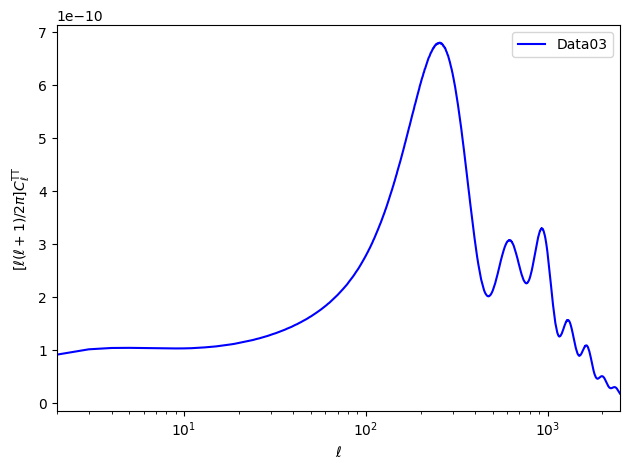

In [4]:
#Create figures
fig_dat, ax_dat = plt.subplots()
legarray = []

#plot data imported
ax_dat.semilogx(l_exp03,tCl_exp03,color='b',linestyle='-')
legarray.append(r'Data03') 

# output of C_l^TT figure
ax_dat.set_xlim([2,2500])
ax_dat.set_xlabel(r'$\ell$')
ax_dat.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_dat.legend(legarray)
fig_dat.tight_layout()  

In [18]:
# Variable wished to determine
var_name = 'Omega_k'
var_array = np.linspace(-0.2,0.2,5)
var_num = len(var_array)
var_legend = r'$\Omega_\mathrm{k}$'
var_figname = 'Omega_k'

# Fixed settings
common_settings = {# LambdaCDM parameters
                   'recombination': 'RECFAST',
                   'h':0.51,
                   'T_cmb':2.7,
                   'omega_b':0.022,
                   'omega_cdm':0.15,
                   'A_s':2.2e-9,
                   'n_s':0.965,
                   'z_reio':11.357,
                   'N_ur':3.3,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl,mPk',
                   }

#Other variables
twopi = 2.*pi

# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

 * Compute with Omega_k=-0.200000
 * Compute with Omega_k=-0.100000
 * Compute with Omega_k=0.000000
 * Compute with Omega_k=0.100000
 * Compute with Omega_k=0.200000


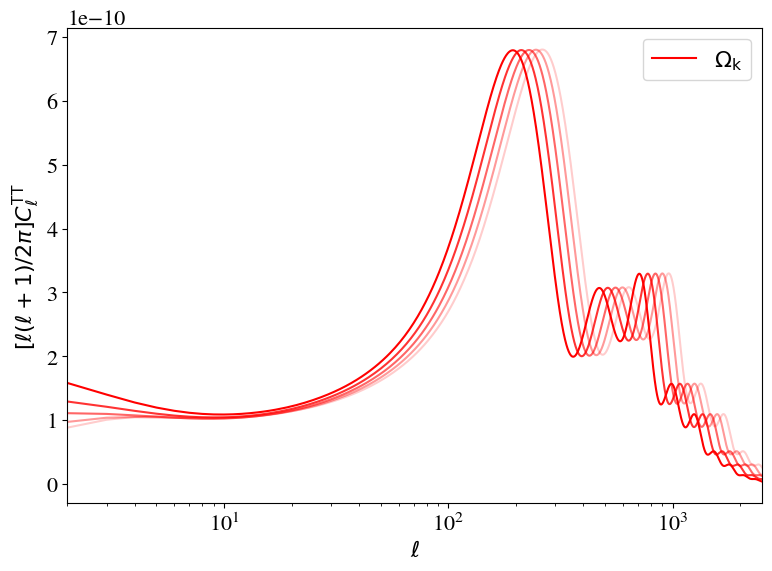

In [19]:
#Create figures
fig_TT, ax_TT = plt.subplots()
legarray = []

M = Class()
# loop over varying parameter values
for i,var in enumerate(var_array):
    print (' * Compute with %s=%f'%(var_name,var))
    # deal with colors and legends
    var_color = 'r'
    var_alpha = 1.*(var_num-i)/var_num
    if i == 0:
        legarray.append(var_legend)  

    # call CLASS
    M.set(common_settings)
    M.set({var_name:var})
    M.compute()

    # get Cls
    clM = M.raw_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    clEE = clM['ee'][2:]
    clPP = clM['pp'][2:]

    tCl = clTT*ll*(ll+1)/twopi

    # plot C_l^TT
    ax_TT.semilogx(ll,tCl,color=var_color,alpha=var_alpha,linestyle='-')

    # reset CLASS
    M.empty()

# output of C_l^TT figure
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout() 